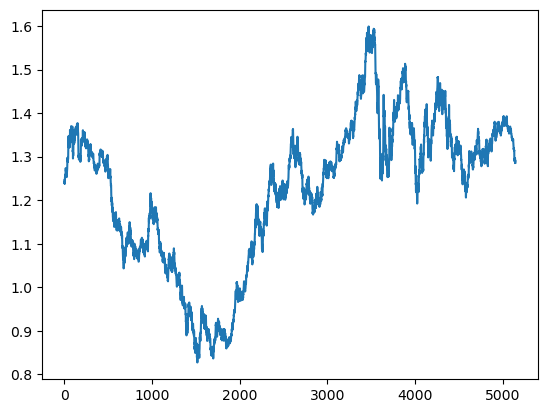

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('SeriesSession12.csv', sep = ";",decimal = ",")
y = data.iloc[:,0]
y.plot()
plt.show()

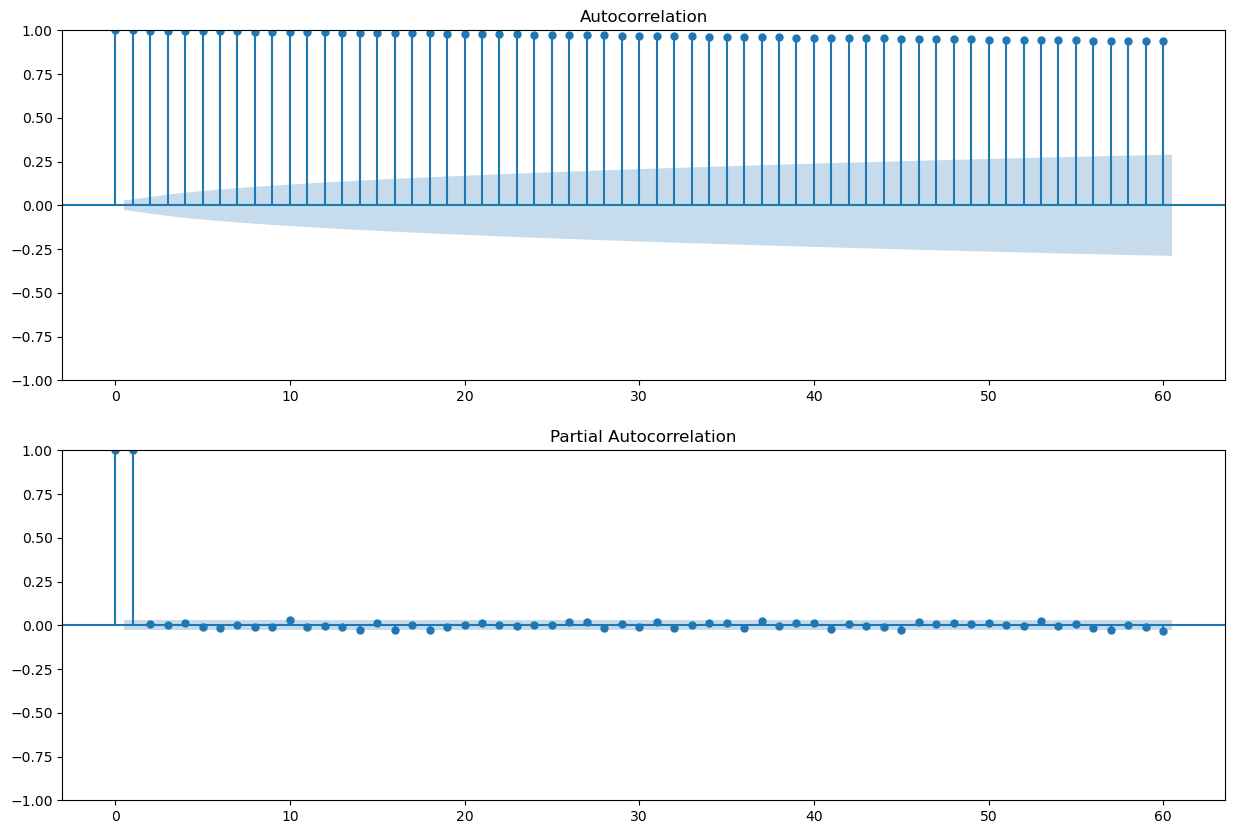

In [132]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 60 # play with this parameter

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(y, lags = nlags,  ax=ax[0])
plot_pacf(y, lags = nlags, method="ols",ax=ax[1])
plt.show()

In [133]:
s = 5 #seasonal parameter
import statsmodels.api as sm
from pmdarima.arima import ndiffs, nsdiffs

# Coincide con lo de R
print('Regular difference:', ndiffs(y, alpha = 0.05, test = 'adf'))
print('Seasonal difference:', nsdiffs(y, m = s, test = 'ocsb'))

Regular difference: 1
Seasonal difference: 0


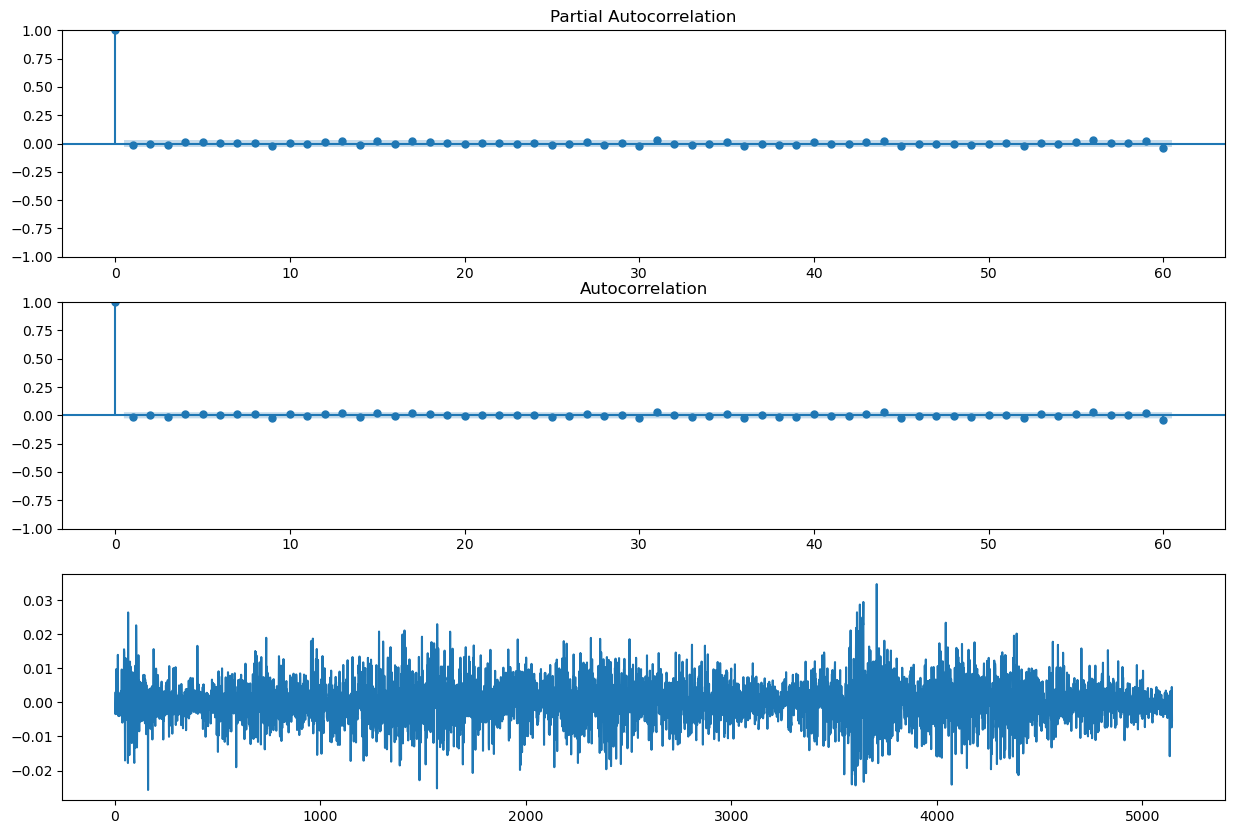

In [134]:
r = np.log(y).diff().dropna()

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r, lags = nlags, method="ols", ax=ax[0])
plot_acf(r, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r)
plt.show()

In [135]:
print('Regular difference:', ndiffs(r, alpha = 0.05, test = 'adf'))
print('Seasonal difference:', nsdiffs(r, m = s, test = 'ocsb'))

Regular difference: 0
Seasonal difference: 0


In [136]:
box_test = sm.stats.acorr_ljungbox(r, lags=[50])
print("Box test for r:", box_test.iloc[0,0]) # Se parece a lo de R pero varía un poco
print("p-value:", box_test.iloc[0,1]) # Casi igual que en R

Box test for r: 44.646437063932794
p-value: 0.6873706706391166


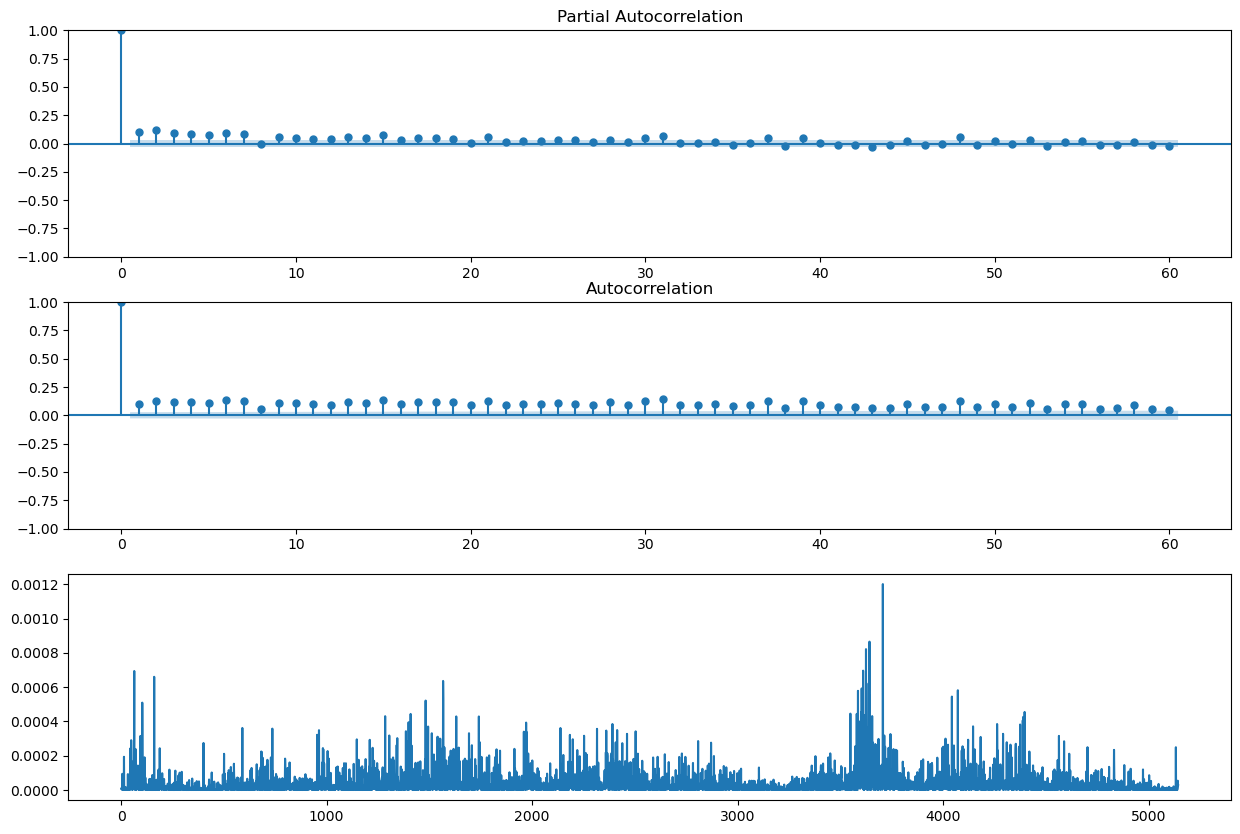

In [137]:
fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r**2, lags = nlags, method="ols", ax=ax[0])
plot_acf(r**2, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r**2)
plt.show()

In [138]:
box_test = sm.stats.acorr_ljungbox(r**2, lags=[20])
print("X_squraed:", box_test.iloc[0,0]) # Se parece a lo de R pero varía un poco
print("p-value:", box_test.iloc[0,1]) # Casi igual que en R (creo que R tiene límite de número pequeño en 2.2 e-15 porque me ha aparecido ya varias veces)

X_squraed: 1266.4829846873442
p-value: 4.4389692563317243e-256


Kurtosis 4.504838848136718
Skewness: 0.06513733591695539


(-0.018398413731907304, 0.01841061040915688)

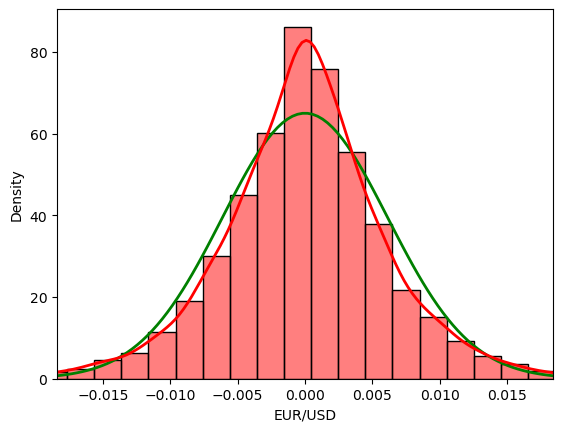

In [139]:
from scipy.stats import skew, kurtosis, shapiro
import scipy.stats as st
import seaborn as sns
# Así coincide con el de R el method = 'moment'
print("Kurtosis",kurtosis(r, fisher = False))
print("Skewness:",skew(r))

mu = np.mean(r)
sigma = np.std(r)
x = np.linspace(mu -3*sigma, mu + 3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = sns.histplot(r, stat="density", color = "r",
                  kde = True, line_kws={'lw': 2}, bins = 30
                   ) # NEW

# ax = plt.hist(r, density = True, range = (mu -4*sigma, mu + 4*sigma), color = "r")
# ax = sns.distplot(r, hist = False, kde = True, kde_kws = {'linewidth':2},
#                  color = "blue") # OLD-DEPRECATD
ax.set_xlim(mu -3*sigma, mu + 3*sigma)

In [140]:
print("Shapiro test:",shapiro(r)[0])
print("Shapiro p-value:",shapiro(r)[1])

Shapiro test: 0.9852805733680725
Shapiro p-value: 9.565649081708191e-23


c:\Users\MMirogranada\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [141]:
# Garch models estimation and prediction
%pip install arch


In [142]:
from arch import arch_model

# model_2 = arch_model(r, mean='Zero', vol='ARCH', p=15)
# model_2_fit = model.fit()
# model_2_fit.summary()

model_2 = arch_model(r, mean='constant', vol='GARCH', p=1, q=1)
# model_2 = arch_model(r, mean='Zero', vol='GARCH', p=1, q=1,dist="StudentsT")
model_2_fit = model_2.fit()
model_2_fit.summary()




Iteration:      1,   Func. Count:      5,   Neg. LLF: -19210.303617972593
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -19210.303621275452
            Iterations: 1
            Function evaluations: 5
            Gradient evaluations: 1


c:\Users\MMirogranada\Anaconda3\lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.764e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\MMirogranada\Anaconda3\lib\site-packages\arch\univariate\base.py:753: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                EUR/USD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                19210.3
Distribution:                  Normal   AIC:                          -38412.6
Method:            Maximum Likelihood   BIC:                          -38386.4
                                        No. Observations:                 5144
Date:                Thu, Mar 02 2023   Df Residuals:                     5143
Time:                        16:49:11   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         6.0983e-06  1.282e-05      0.476      0.634 [-1.902e-05,3.122e-05]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      7.5272e-07  2.710e-11  2.778e+04      0.000 [7.527e-07,7.528e-07]
alpha[1]       0.0500  4.521e-03     11.060  1.953e-28 [4.114e-02,5.886e-02]
beta[1]        0.9300  4.323e-03    215.116      0.000     [  0.922,  0.938]
============================================================================

Covariance estimator: robust
WARNING: The optimizer did not indicate successful convergence. The message was Inequality constraints incompatible.
See convergence_flag.

"""

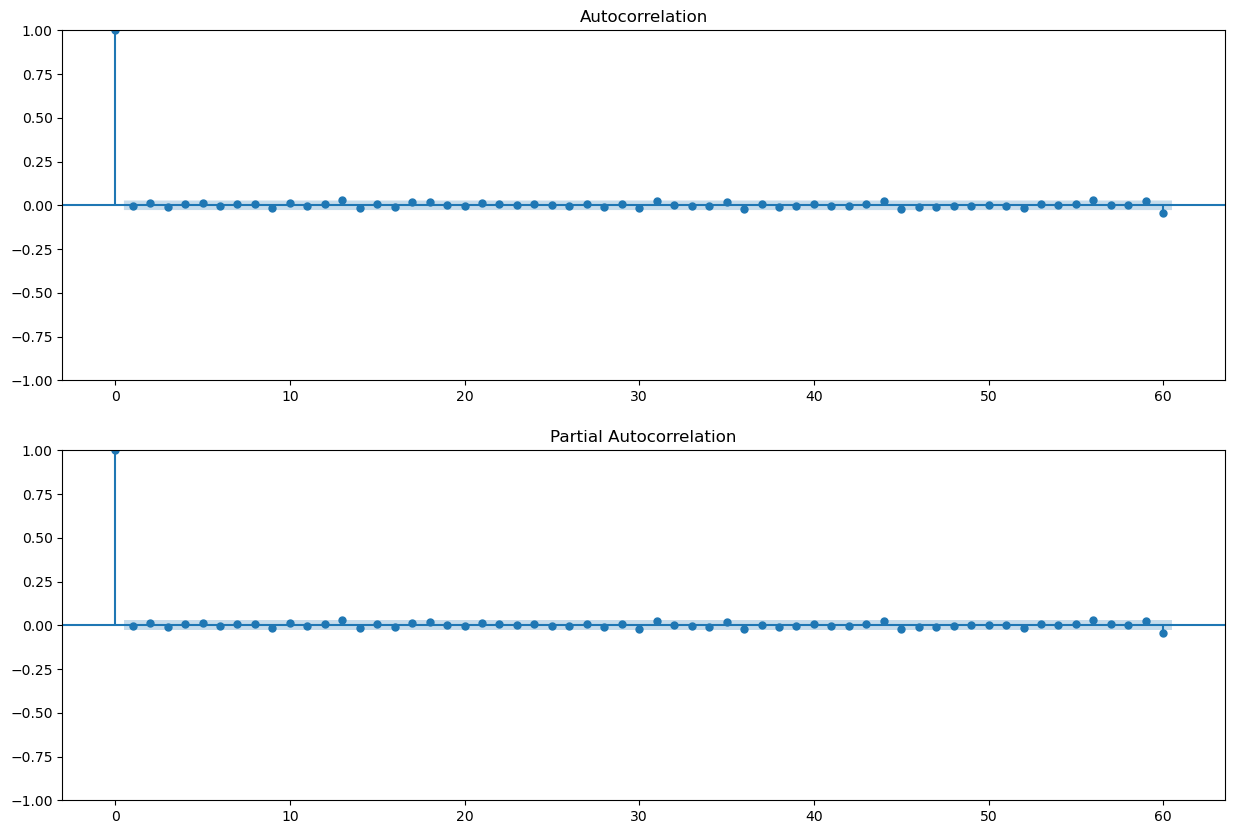

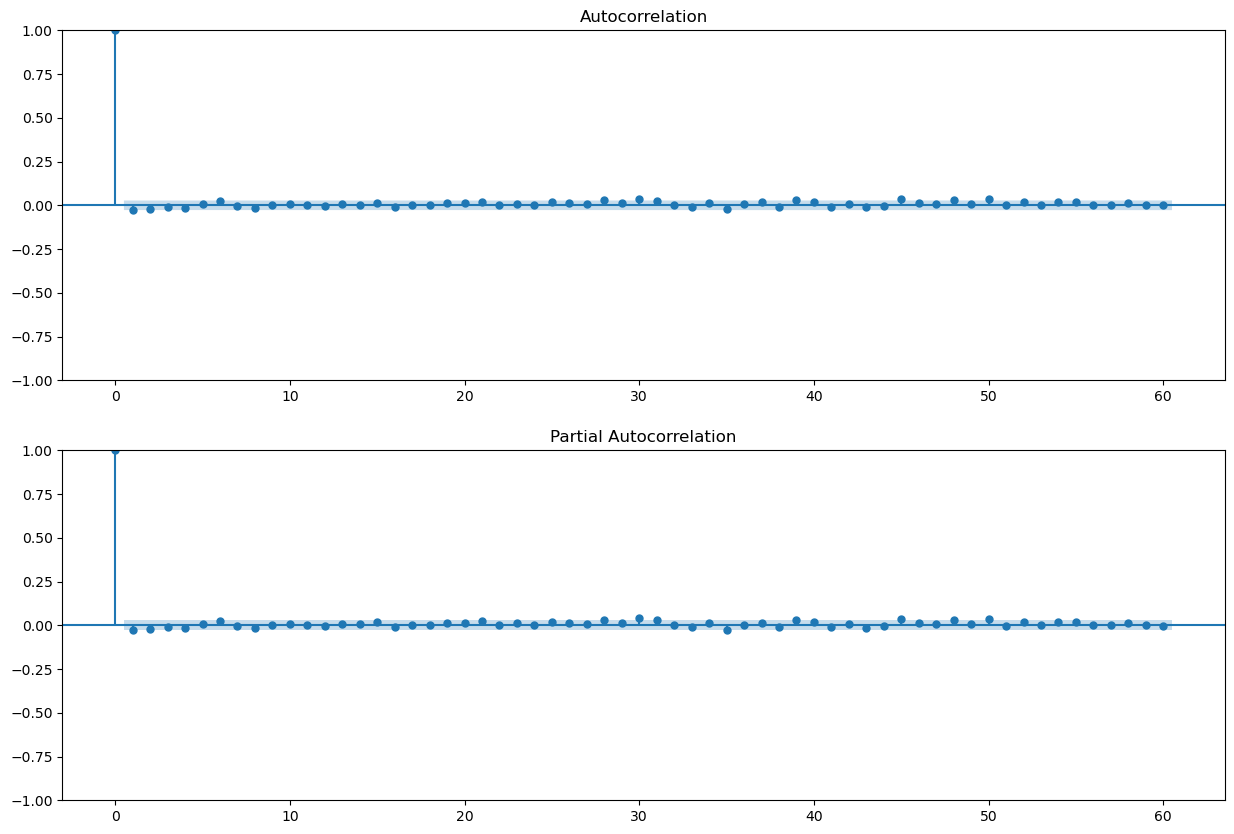

Residuals Box test: 20.428261497723003 p-value: 0.9049112948346462
Squared Residuals Box test: 35.7740916690881 p-value: 0.21556646917056982


In [143]:
std_resid = model_2_fit.resid / model_2_fit.conditional_volatility
fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid, lags = nlags,  ax=ax[0])
plot_pacf(std_resid, lags = nlags, method="ols",ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid**2, lags = nlags,  ax=ax[0])
plot_pacf(std_resid**2, lags = nlags, method="ols",ax=ax[1])
plt.show()

box_test = sm.stats.acorr_ljungbox(std_resid, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(std_resid**2, lags=[30])
print("Residuals Box test:", box_test.iloc[0,0],"p-value:", box_test.iloc[0,1]) # 
print("Squared Residuals Box test:", box_test2.iloc[0,0],"p-value:", box_test2.iloc[0,1]) #

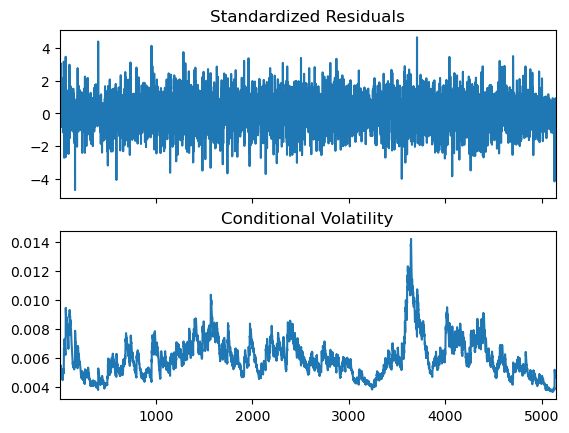

In [144]:
# Plot fitted results
model_2_fit.plot()
plt.show()

In [145]:
import pandas as pd
import math
# Make 5-period ahead forecast
model_2_fit_forecast = model_2_fit.forecast(horizon = 5, reindex = False )
#print("Conditional variance:",model_2_fit_forecast.variance.values[-1:])
volatility = np.sqrt(model_2_fit_forecast.variance.values[-1:][0])
print("Volatility:",volatility)

Volatility: [0.00489716 0.00492496 0.00495206 0.00497847 0.00500421]


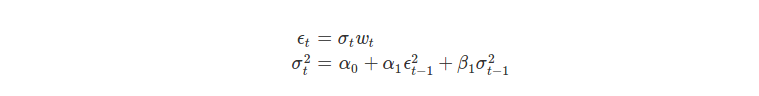

<AxesSubplot: >

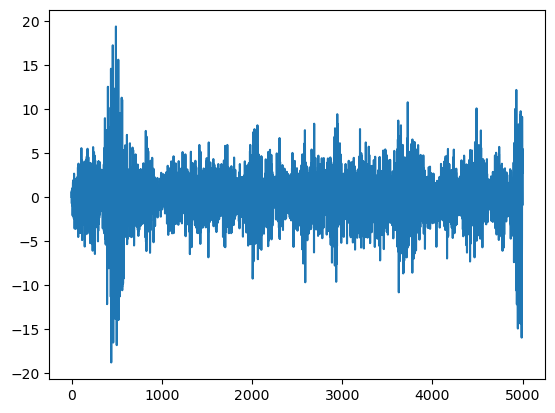

In [146]:
# Simulate a AR(1)+GARCH(1,1) model
np.random.seed()

import seaborn as sns
a0 = 0.1
a1 = 0.1
b1 = 0.89

n = 5000
w = np.random.normal(size=n)
eps = np.zeros_like(w)
sigsq = np.zeros_like(w)

for i in range(1, n):
    sigsq[i] = a0 + a1*(eps[i-1]**2) + b1*sigsq[i-1]
    eps[i] = w[i] * np.sqrt(sigsq[i])

sns.lineplot(data = eps)

<AxesSubplot: >

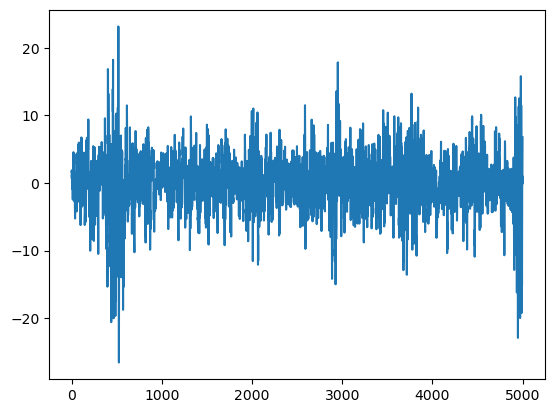

In [147]:
# Simulate an AR(1) process with alpha = 0.75

np.random.seed(1)
n_samples = int(5000)
a = 0.75
y = w = np.random.normal(size=n_samples)

for t in range(n_samples):
    y[t] = a*y[t-1] + eps[t]
    
sns.lineplot(data = y)

In [148]:
# Estimate and forecast just with the linear AR(1) model

model = sm.tsa.arima.ARIMA(y, order = (1,0,0)).fit(method = 'innovations_mle')
arima_residuals = model.resid
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -12317.219
Date:                Thu, 02 Mar 2023   AIC                          24640.439
Time:                        16:49:13   BIC                          24659.990
Sample:                             0   HQIC                         24647.291
                               - 5000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0306      0.136     -0.225      0.822      -0.297       0.236
ar.L1          0.7020      0.007    103.734      0.000       0.689       0.715
sigma2         8.0758      0.095     84.590      0.000       7.889       8.263
===================================================================================
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):              3098.53
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

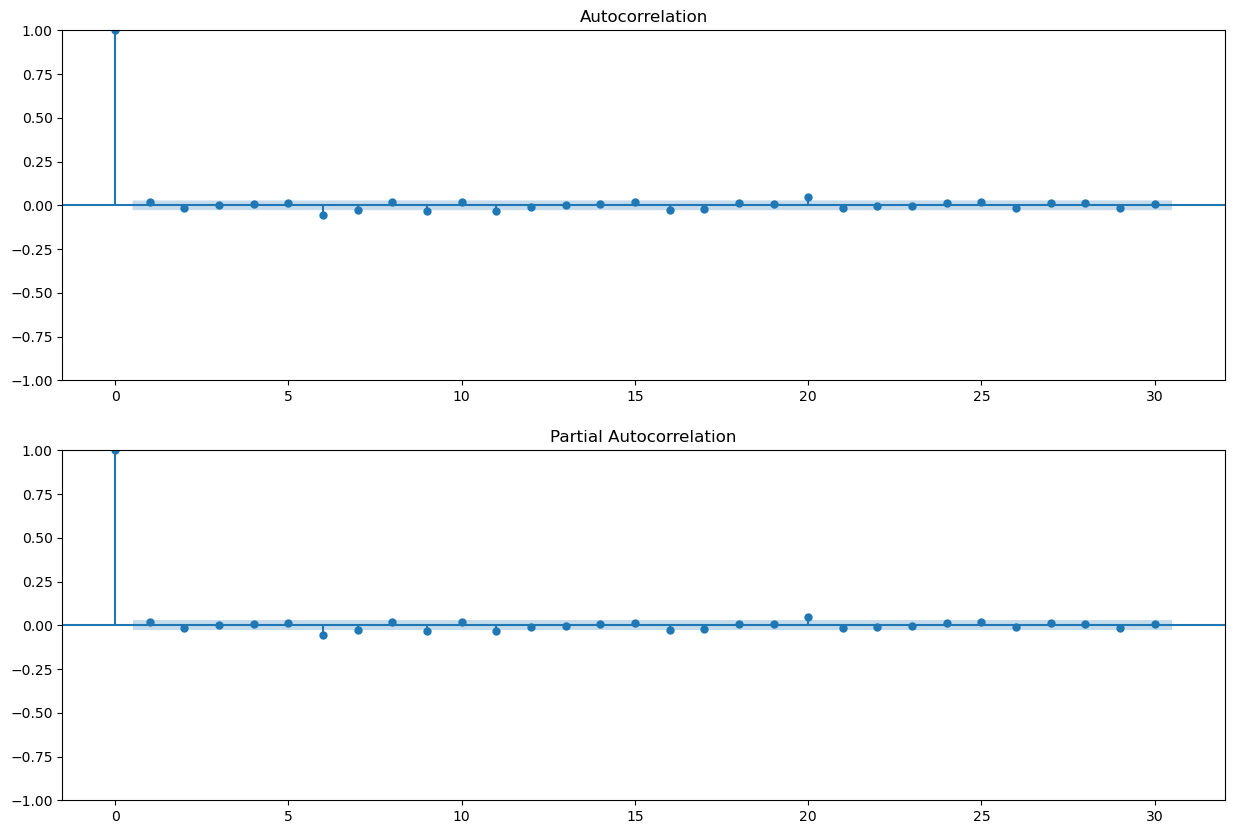

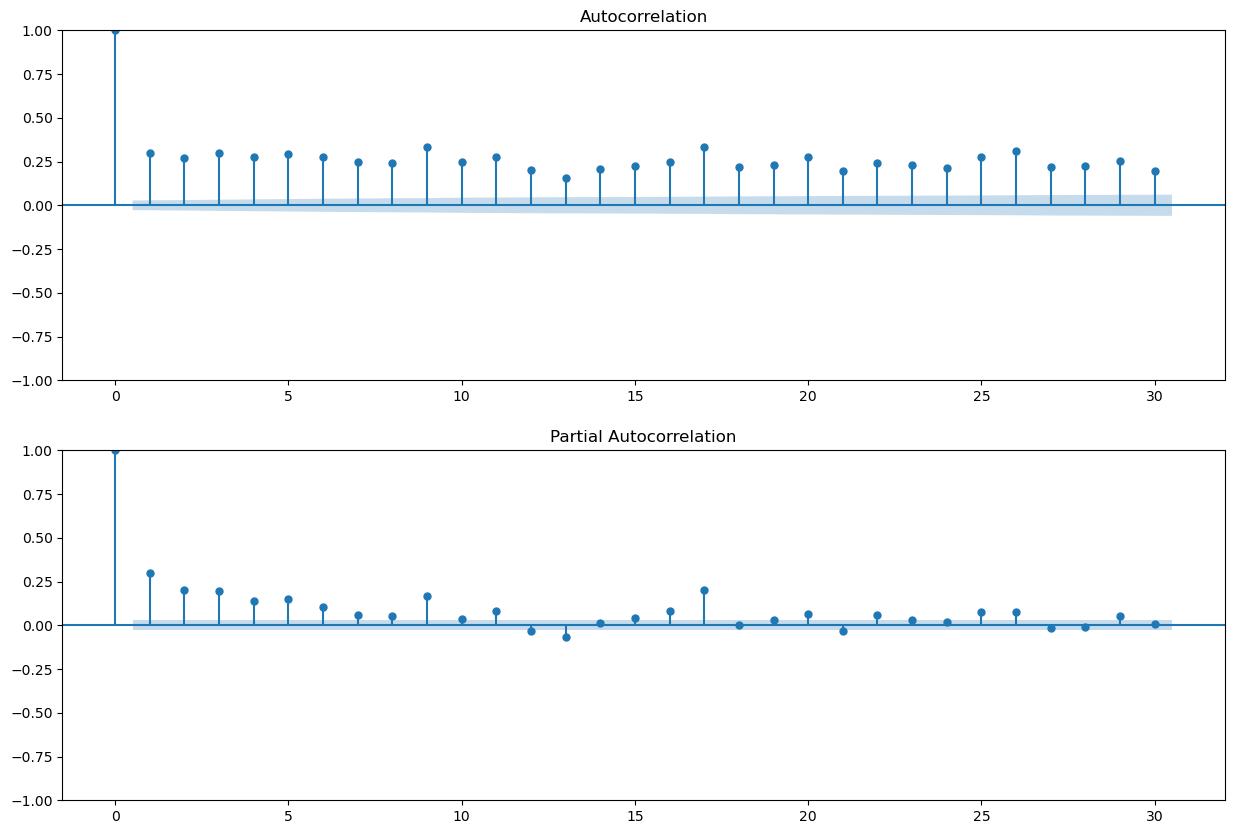

Residuals Box test: 66.09562415999478 p-value: 0.00015856400790806462
Squared Residuals Box test: 9665.156247589206 p-value: 0.0


In [149]:
nlags=30
fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(arima_residuals, lags = nlags,  ax=ax[0])
plot_pacf(arima_residuals, lags = nlags, method="ols",ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(arima_residuals**2, lags = nlags,  ax=ax[0])
plot_pacf(arima_residuals**2, lags = nlags, method="ols",ax=ax[1])
plt.show()

box_test = sm.stats.acorr_ljungbox(arima_residuals, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(arima_residuals**2, lags=[30])
print("Residuals Box test:", box_test.iloc[0,0],"p-value:", box_test.iloc[0,1]) # 
print("Squared Residuals Box test:", box_test2.iloc[0,0],"p-value:", box_test2.iloc[0,1]) # 

In [150]:
# fit a GARCH(1,1) model on the residuals of the ARIMA model
# garch = arch_model(arima_residuals).fit()
# garch.summary()


model_2 = arch_model(arima_residuals, mean='constant', vol='GARCH', p=1, q=1)
# model_2 = arch_model(r, mean='constant', vol='GARCH', p=1, q=1,dist="StudentsT")
model_2_fit = model_2.fit()
model_2_fit.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 256281395085.31555
Iteration:      2,   Func. Count:     14,   Neg. LLF: 14132904284.3653
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11551.222497596355
Iteration:      4,   Func. Count:     28,   Neg. LLF: 11822.149112497978
Iteration:      5,   Func. Count:     34,   Neg. LLF: 11527.617693803071
Iteration:      6,   Func. Count:     40,   Neg. LLF: 11753.678024159526
Iteration:      7,   Func. Count:     47,   Neg. LLF: 11534.236818053803
Iteration:      8,   Func. Count:     54,   Neg. LLF: 11523.512808560437
Iteration:      9,   Func. Count:     59,   Neg. LLF: 11523.512788803579
Iteration:     10,   Func. Count:     63,   Neg. LLF: 11523.512788803719
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11523.512788803579
            Iterations: 10
            Function evaluations: 63
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11523.5
Distribution:                  Normal   AIC:                           23055.0
Method:            Maximum Likelihood   BIC:                           23081.1
                                        No. Observations:                 5000
Date:                Thu, Mar 02 2023   Df Residuals:                     4999
Time:                        16:49:14   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0367  3.056e-02      1.201      0.230 [-2.319e-02,9.661e-02]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0903  2.132e-02      4.235  2.288e-05 [4.850e-02,  0.132]
alpha[1]       0.0910  8.886e-03     10.236  1.365e-24 [7.354e-02,  0.108]
beta[1]        0.8979  1.005e-02     89.356      0.000   [  0.878,  0.918]
==========================================================================

Covariance estimator: robust
"""

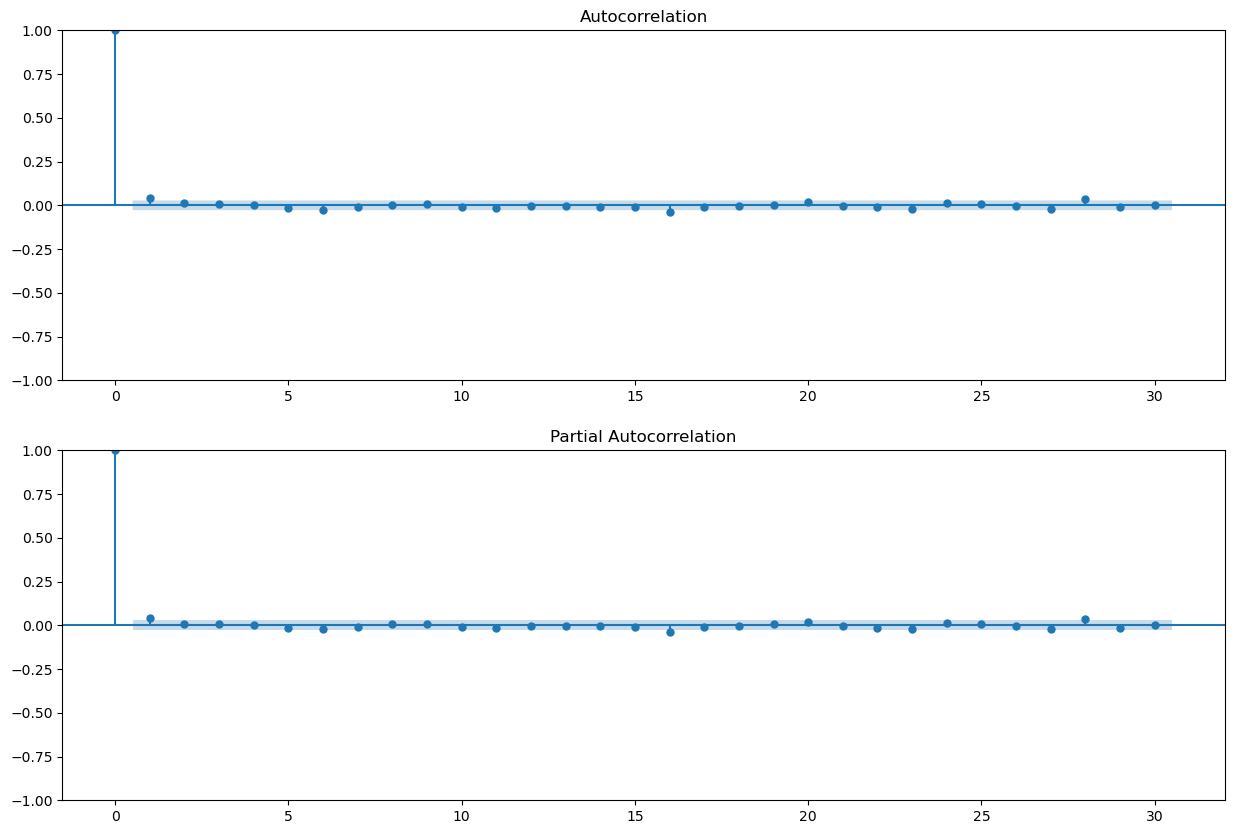

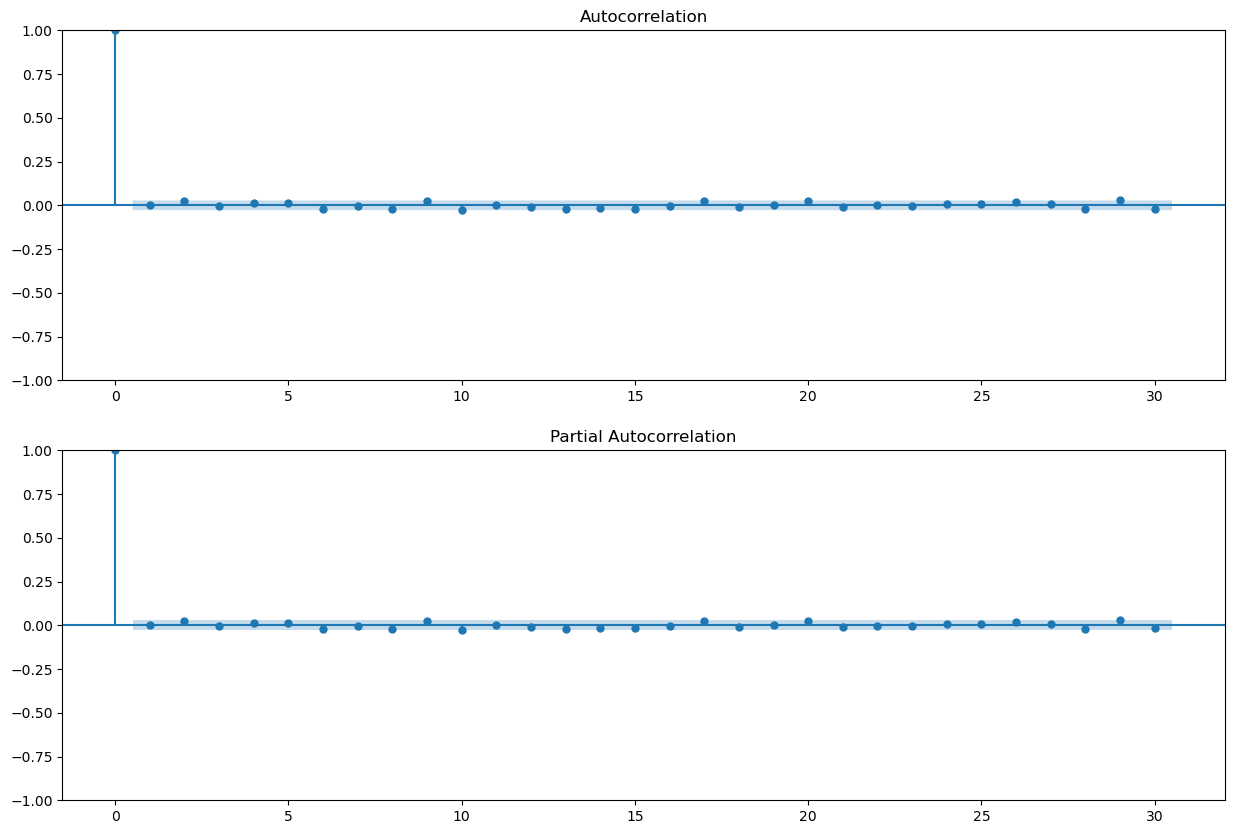

Residuals Box test: 38.246431534837726 p-value: 0.14352440036026576
Squared Residuals Box test: 0.10835103056984685 p-value: 0.10835103056984685


In [151]:
#std_resid = model.resid / model.conditional_volatility
std_resid = model_2_fit.resid / model_2_fit.conditional_volatility
fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid, lags = nlags,  ax=ax[0])
plot_pacf(std_resid, lags = nlags, method="ols",ax=ax[1])
plt.show()

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(std_resid**2, lags = nlags,  ax=ax[0])
plot_pacf(std_resid**2, lags = nlags, method="ols",ax=ax[1])
plt.show()

box_test = sm.stats.acorr_ljungbox(std_resid, lags=[30])
box_test2 = sm.stats.acorr_ljungbox(std_resid**2, lags=[30])
print("Residuals Box test:", box_test.iloc[0,0],"p-value:", box_test.iloc[0,1]) # 
print("Squared Residuals Box test:", box_test2.iloc[0,1],"p-value:", box_test2.iloc[0,1]) # 

In [152]:
# Make 5-period ahead forecast
#model_2_fit_forecast = model_2_fit.forecast(horizon = 5)
#print("Conditional variance:",model_2_fit_forecast.variance.values[-1:])

import pandas as pd
import math
# Make 5-period ahead forecast
model_2_fit_forecast = model_2_fit.forecast(horizon = 5, reindex = False )
volatility = np.sqrt(model_2_fit_forecast.variance.values[-1:][0])
print("Volatility:",volatility)


Volatility: [5.68486279 5.6611426  5.63758806 5.6141983  5.59097243]
